In [1]:
import pandas as pd
import numpy as np
import pubchempy as pcp

from rdkit.Chem import Fragments as fr
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt

from upsetplot import generate_counts
from upsetplot import plot
from upsetplot import from_memberships
import itertools
import random

In [2]:
tcaa_result_df = result_df[:1000]

NameError: name 'result_df' is not defined

In [3]:
result_df_d = result_df.sort_values('raw_DCAA', ascending=True)

NameError: name 'result_df' is not defined

In [4]:
dcaa_result_df = result_df_d[:1000]

NameError: name 'result_df_d' is not defined

In [5]:
tcaa_result_df.to_csv("excel_py/result_df_TCAA1000.csv",header=True,index=False)
dcaa_result_df.to_csv("excel_py/result_df_DCAA1000.csv",header=True,index=False)

NameError: name 'tcaa_result_df' is not defined

In [6]:
result_df1 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA1.csv")
result_df2 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA2.csv")
result_df3 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA3.csv")
result_df4 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA4.csv")
result_df5 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA5.csv")
print("5")
result_df6 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA6.csv")
result_df7 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA7.csv")
result_df8 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA8.csv")
result_df9 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA9.csv")
result_df10 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA10.csv")
print("10")
result_df11 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA11.csv")
result_df12 = pd.read_csv("/Volumes/SONY_128CA2/result_TCAA_DCAA12.csv")

5
10


In [2]:
result_df1 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA.csv")
result_df2 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA2.csv")
result_df3 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA3.csv")
result_df4 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA4.csv")
result_df5 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA5.csv")
print("5")
result_df6 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA6.csv")
result_df7 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA7.csv")
result_df8 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA8.csv")
result_df9 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA9.csv")
result_df10 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA10.csv")
print("10")
result_df11 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA11.csv")
result_df12 = pd.read_csv("/Users/moriirei/Desktop/とりあえず/result_TCAA_DCAA12.csv")

5
10


In [7]:
result_df = pd.concat([result_df1,result_df2,result_df3,result_df4,result_df5,result_df6,result_df7,result_df8,result_df9,result_df10,result_df11,result_df12], axis=0)

In [8]:
result_df.shape
result_df.describe()

,CID,TCAA,DCAA
count,1.113903e+08,1.113903e+08,1.113903e+08
mean,5.573216e+07,1.984130e+00,1.784934e+00
std,3.217591e+07,7.202479e-01,4.837137e-01
min,1.000000e+00,1.045034e-03,1.079553e-01
25%,2.787454e+07,1.668163e+00,1.477800e+00
50%,5.572378e+07,2.076607e+00,1.970877e+00
75%,8.359836e+07,2.425874e+00,2.127609e+00
max,1.114569e+08,6.057471e+00,3.582060e+00


In [9]:
result_df[result_df["TCAA"] == result_df["TCAA"].max()]

,CID,TCAA,DCAA
0,49788089,6.057471,2.514149
1,10383,6.057471,2.514149


In [20]:
result_df[result_df["CID"] == 359]
np.exp()

,CID,TCAA,DCAA
358,359,5.314467,4.293765


In [ ]:
result_df["log10_TCAA"].min()

In [10]:
result_df.shape
result_df["raw_TCAA"] = np.exp(result_df["TCAA"])-1
print("ok")
result_df["log10_TCAA"] = np.log10(result_df["raw_TCAA"])
print("ok")
result_df["raw_DCAA"] = np.exp(result_df["DCAA"])-1
result_df["log10_DCAA"] = np.log10(result_df["raw_DCAA"])

ok
ok


In [86]:
result_df["log10_DCAA"].describe()

count    1.113903e+08
mean     6.755115e-01
std      2.885078e-01
min     -9.431028e-01
25%      5.293397e-01
50%      7.907755e-01
75%      8.689247e-01
max      1.543416e+00
Name: log10_DCAA, dtype: float64

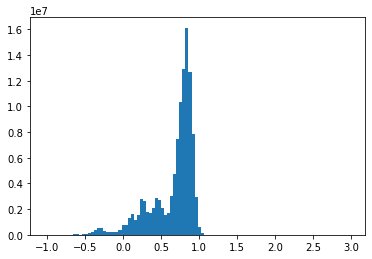

In [11]:
plt.hist(result_df["log10_DCAA"], bins=100, range=(-1,3),
                       bottom=None, histtype='bar',
                       align='left', rwidth=1,
                       color=None)
#plt.savefig("/Users/moriirei/Desktop/研究室/卒論/fig/dcaa_distribution_all.pdf")
plt.show()

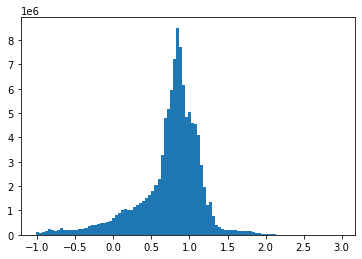

In [12]:
plt.hist(result_df["log10_TCAA"], bins=100, range=(-1,3),
                       bottom=None, histtype='bar',
                       align='left', rwidth=1,
                       color=None)
#plt.savefig("/Users/moriirei/Desktop/研究室/卒論/fig/dcaa_distribution_all.pdf")
plt.show()

In [7]:
# ((result_df["log10_TCAA"] >= 2.0) & (result_df["log10_TCAA"] < 2.5)).sum()

In [7]:
div_list = [(result_df["log10_TCAA"] >= 2.0).sum()
                ,(result_df["log10_TCAA"] >= 1.5).sum()
                ,(result_df["log10_TCAA"] >= 1.0).sum()
                ,(result_df["log10_TCAA"] >= 0.5).sum()
                ,(result_df["log10_TCAA"] >= 0.0).sum()
               ,(result_df["log10_TCAA"] > -10000).sum()]
div_per_list = [float(i)/float(len(result_df))*100 for i in div_list]
div_per_str_list = ["2.0~","1.5~2.0","1.0~1.5","0.5~1.0","0~0.5","~0.0"]
div_per_list

[0.11458450311297805,
 1.7165725616582295,
 26.507883573792224,
 80.90631802966723,
 93.40165593082578,
 100.0]

In [87]:
div_list = [(result_df["log10_DCAA"] >= 2.0).sum()
                ,(result_df["log10_DCAA"] >= 1.5).sum()
                ,(result_df["log10_DCAA"] >= 1.0).sum()
                ,(result_df["log10_DCAA"] >= 0.5).sum()
                ,(result_df["log10_DCAA"] >= 0.0).sum()
               ,(result_df["log10_DCAA"] > -10000).sum()]
div_per_list = [float(i)/float(len(result_df))*100 for i in div_list]
div_per_str_list = ["2.0~","1.5~2.0","1.0~1.5","0.5~1.0","0~0.5","~0.0"]
k_list = [int(div_list[0]),10000,10000,10000,10000,10000,10000]
div_per_list

[0.0,
 3.5909775647302656e-06,
 0.6363885552995419,
 76.69033620626202,
 96.80732109832813,
 100.0]

In [88]:
div_list

[0, 4, 708875, 85425581, 107833947, 111390281]

In [89]:
print(div_list[0])
for i in range(len(div_list)-1):
    print(div_list[i+1] - div_list[i])
print(div_per_list[0])
for i in range(len(div_per_list)-1):
    print(div_per_list[i+1] - div_per_list[i])    

0
4
708871
84716706
22408366
3556334
0.0
3.5909775647302656e-06
0.6363849643219771
76.05394765096247
20.116984892066114
3.1926789016718686


In [10]:
# div_per_list = [0.1,0.5,1,5,10,50]
# div_per_str_list = ["0~0.1","0.1~0.5","0.5~1","1~5","5~10","10~50","50~100"]

In [11]:
functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]

In [12]:
def create_functional_group_df():
    functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
    functional_group_df = pd.DataFrame(columns = functional_group_list)
    for i in range(0,297):
        a = fr.fr_phenol(df_result["ROMol"][i])
        b = fr.fr_methoxy(df_result["ROMol"][i])
        c = fr.fr_ketone(df_result["ROMol"][i])
        d = fr.fr_aniline(df_result["ROMol"][i])
        e = fr.fr_benzene(df_result["ROMol"][i])
        functional_group_df.loc[i] = [a,b,c,d,e]

In [13]:
def create_functional_group_df(df_result):
    functional_group_list = ["phenol","methoxy","ketone","aniline","benzene"]
    functional_group_df = pd.DataFrame(columns = functional_group_list)
    df_result = df_result.dropna(subset=['ROMol'])
    df_result.reset_index(drop=True, inplace=True)
    for i in range(len(df_result)):
        a = fr.fr_phenol(df_result["ROMol"][i])
        b = fr.fr_methoxy(df_result["ROMol"][i])
        c = fr.fr_ketone(df_result["ROMol"][i])
        d = fr.fr_aniline(df_result["ROMol"][i])
        e = fr.fr_benzene(df_result["ROMol"][i])
        functional_group_df.loc[i] = [a,b,c,d,e]
    return functional_group_df

In [14]:
def divideNumber(number):
    div_number_list =  [0] + [int(float(i)/float(100)*float(number)) for i in div_per_list]
    return div_number_list

In [15]:
# def divideNumber(number):
#     div_number_list =  [0] + [int(float(i)/float(100)*float(number)) for i in div_per_list] + [number]
#     return div_number_list

In [16]:
div_number_list = divideNumber(len(result_df))
div_number_list

[0, 0, 4, 708875, 85425581, 107833947, 111390281]

In [37]:
def createRandom(div_number_list):
    random_list = []
    for i in range(0,len(div_number_list)-1):
        if div_number_list[i+1] - div_number_list[i] > 10000:
            tem_k = 10000
        else:
            tem_k= div_number_list[i+1] - div_number_list[i]
        random_list.append(sorted(random.sample(range(div_number_list[i],div_number_list[i+1]), k=tem_k)))
    return random_list

In [38]:
len(div_number_list)

7

In [83]:
def createRandomDic():
    random_dic = {}
    random_list = createRandom(divideNumber(len(result_df)))
    properties = ['IUPACName','CanonicalSMILES','MolecularFormula']
    for i in range(len(random_list)):
        print(i)
        tem_df = result_df.iloc[random_list[i]]
        if len(tem_df) != 0:
            tem_df = pd.DataFrame(pcp.get_properties(properties, list(tem_df["CID"]), 'cid'))
            PandasTools.AddMoleculeColumnToFrame(tem_df, smilesCol='CanonicalSMILES', includeFingerprints=False)
            tem2_df = create_functional_group_df(tem_df)
            tem2_df = pd.concat([tem_df,tem2_df],axis = 1)
        else:
            tem2_df = tem_df
        random_dic[div_per_str_list[i]] = tem2_df
    return random_dic

In [60]:
# random_list = []
# random_dic = createRandomDic()

In [61]:
# random_dic["2.0~"][(random_dic["2.0~"]["phenol"] == 0) & (random_dic["2.0~"]["aniline"] > 0) & (random_dic["2.0~"]["benzene"] == 0) & (random_dic["2.0~"]["methoxy"] == 0) & (random_dic["2.0~"]["ketone"] == 0)][["CID","ROMol"]]

In [62]:
def show_figure1(functional_group_df,title):
    l = functional_group_list
    c_f_tuple = []
    c_f_list = []
    data_list = []
    for i in range(1,len(l)+1):
        c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
    for i in c_f_tuple:
        c_f_list.append(list(i))
    for i in c_f_list: 
        count = 0
        for j in range(0,len(functional_group_df)):
            if list(pd.DataFrame(functional_group_df.iloc[j][functional_group_df.iloc[j]>0]).index) == i:            
                count = count + 1
        data_list.append(count)            
    source = from_memberships(
    c_f_list,
    data=data_list
    )
    plot(source, show_counts="%d",sort_by='cardinality')
    plt.suptitle(str(title))
    plt.show()

In [63]:
def createSource(functional_group_df):
    l = functional_group_list
    c_f_tuple = []
    c_f_list = []
    data_list = []
    for i in range(1,len(l)+1):
        c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
    for i in c_f_tuple:
        c_f_list.append(list(i))
    c_f_list.append([]) #空
    for i in c_f_list: 
        count = 0
        for j in range(0,len(functional_group_df)):
            if list(pd.DataFrame(functional_group_df.iloc[j,5:][functional_group_df.iloc[j,5:]>0]).index) == i:            
                count = count + 1
        data_list.append(count)            
    return data_list

In [64]:
def create_c_f_list():
    l = functional_group_list
    c_f_tuple = []
    c_f_list = []
    data_list = []
    for i in range(1,len(l)+1):
        c_f_tuple = c_f_tuple + list(itertools.combinations(l, i))
    
    for i in c_f_tuple:
        c_f_list.append(list(i))
    c_f_list.append([]) #空
    return c_f_list
c_f_list = create_c_f_list()

In [65]:
# Remake

In [84]:
times = 10
source_one_time = {}
source_10times = []
for i in range(times):
    source_one_time = {}
    random_dic = createRandomDic()
    print(str(i) + "time")
    for j in range(len(random_dic)):
        print(str(div_per_str_list[j]) + "FP")
        functional_group_df = random_dic[div_per_str_list[j]]
        source_one_time[div_per_str_list[j]] = createSource(functional_group_df)
    source_10times.append(source_one_time)  
print("finish create source")

source_result_df_dic = {}
source_result_list = {}
source_one_fp_list = []
for j in range(len(random_dic)):
    source_result_list = []
    source_one_fp_list = []
    for i in range(times):
        source_one_fp_list.append(source_10times[i][div_per_str_list[j]])
    source_one_fp_list_t = np.array(source_one_fp_list).T.tolist() 
    for i in source_one_fp_list_t:
        tem = np.array(i)
        source_result_list.append([int(tem.mean()),tem.std(),tem.std()/tem.mean()])
    source_result_list = np.array(source_result_list).T.tolist()
    source_result_df_dic[div_per_str_list[j]] = pd.DataFrame(source_result_list,index = ["MN","SD","CV"])

for i in div_per_str_list:
    source_result_df_dic[i].to_csv("excel_py/" + str(i) + "_DCAA.csv",header=True,index=False)

0
1
2
3
4
5
0time
2.0~FP
1.5~2.0FP
1.0~1.5FP
0.5~1.0FP
0~0.5FP
~0.0FP
0
1
2
3
4
5
1time
2.0~FP
1.5~2.0FP
1.0~1.5FP
0.5~1.0FP
0~0.5FP
~0.0FP
0
1
2
3
4
5
2time
2.0~FP
1.5~2.0FP
1.0~1.5FP
0.5~1.0FP
0~0.5FP


KeyboardInterrupt: 

In [78]:
random_dic[div_per_str_list[2]]

KeyboardInterrupt: 

In [209]:
def show_figure1(data,title):
    source = from_memberships(
    c_f_list,
    data=data
    )
    plot(source, show_counts="%d",sort_by='cardinality')
    plt.suptitle(str(title))
    plt.savefig("fig/figure" + str(title) + ".pdf")
    plt.show()

In [193]:
source_result_df_dic[div_per_str_list[1]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
MN,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000,0.0,17.000000,30.000000,39.000000,2154.000000,0.0,0.0,0.0,1399.00000,6.000000,6.000000,1263.00000,3.000000,209.000000,1697.000000,0.0,0.0,649.000000,0.0,276.000000,535.000000,0.000000,196.000000,725.000000,125.000000,0.0,183.000000,173.000000,80.000000,78.000000,39.000000
SD,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962,0.0,8.383250,22.934666,31.054719,962.852524,0.0,0.0,0.0,1153.42586,5.435966,3.537851,133.36030,2.856717,107.599457,1296.960065,0.0,0.0,653.417434,0.0,230.329698,399.422879,1.166190,52.093215,256.448102,90.953523,0.0,163.439812,145.583824,70.048436,37.883517,34.112962
CV,NaN,0.480875,0.748683,0.790867,0.446979,NaN,NaN,NaN,0.82419,0.813361,0.519000,0.10553,0.906894,0.512582,0.7640

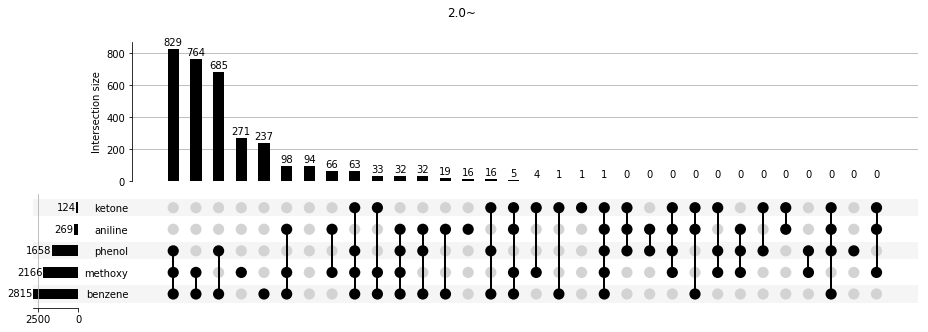

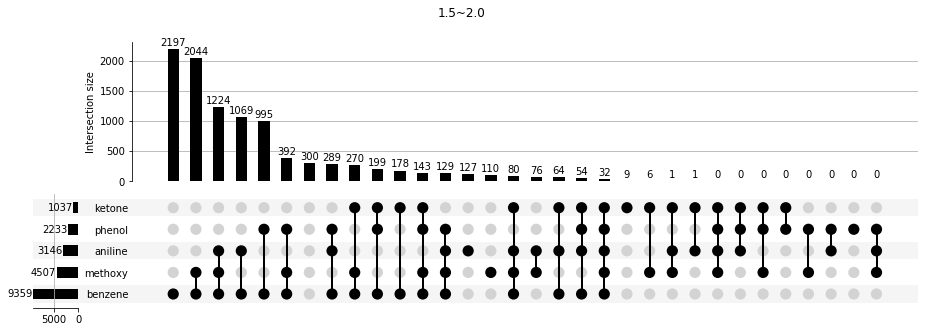

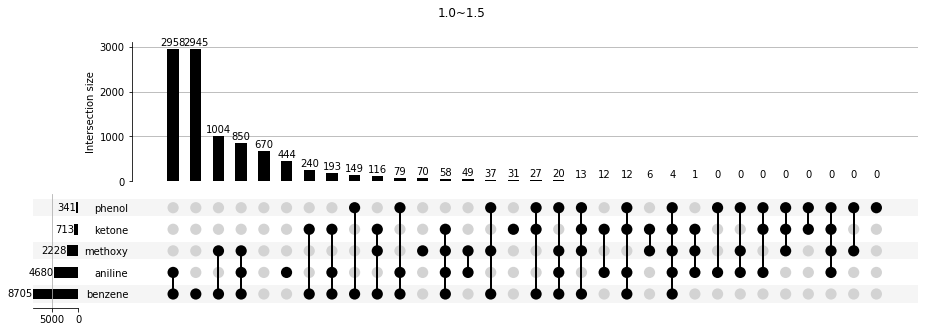

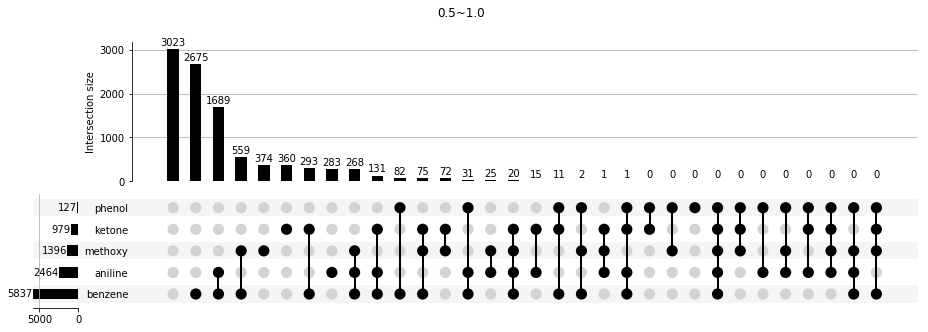

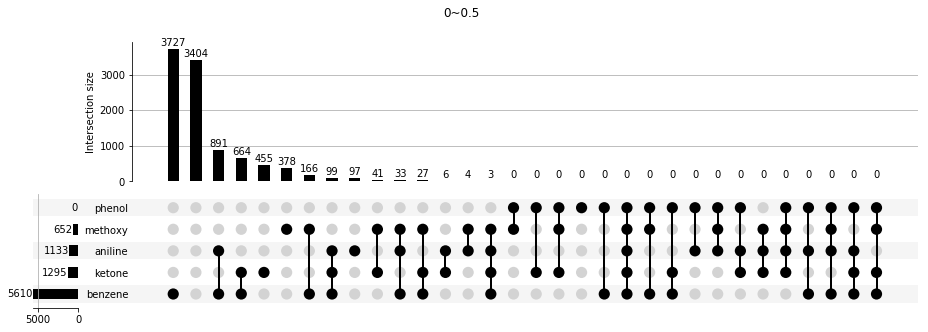

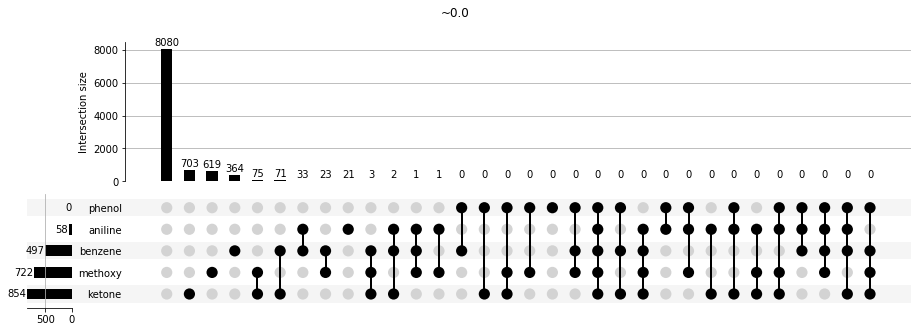

In [208]:
for i in range(len(source_result_df_dic)):
    tem = source_result_df_dic[div_per_str_list[i]]
    data = list(tem.loc["MN"])
    title = div_per_str_list[i]
    show_figure1(data,title)

In [201]:
all_data = pd.read_csv("/Users/moriirei/Desktop/研究室/modeling of biodegradation/python of model/excel_py/all_all.csv")

In [202]:
all_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.0,169.000000,134.000000,359.000000,2914.000000,0.0,0.0,0.0,143.000000,25.000000,43.000000,860.000000,11.000000,273.000000,2442.000000,0.0,0.0,38.000000,0.0,22.000000,67.000000,2.000000,103.000000,658.000000,162.000000,0.0,12.000000,18.000000,10.000000,41.000000,3.000000,1479.000000
1,0.0,7.912648,11.766478,12.491997,26.907991,0.0,0.0,0.0,13.170042,3.130495,5.197115,27.589128,2.227106,13.448048,35.941619,0.0,0.0,5.181699,0.0,3.950949,9.243917,2.012461,12.185647,34.391278,8.072174,0.0,3.059412,3.693237,1.907878,5.362835,2.426932,30.584310
2,NaN,0.046627,0.087483,0.034748,0.009232,NaN,NaN,NaN,0.091777,0.125220,0.120026,0.032073,0.198849,0.049170,0.014718,NaN,NaN,0.134590,NaN,0.177173,0.136947,0.804984,0.117282,0.052203,0.049583,NaN,0.239017,0.198561,0.179989,0.128297,0.622290,0.020679


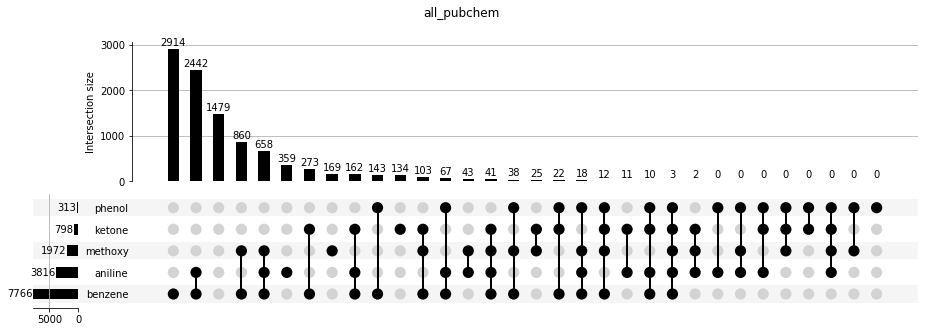

In [210]:
data = list(all_data.iloc[0])
title = "all_pubchem"
show_figure1(data,title)

In [ ]:
# 

CID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
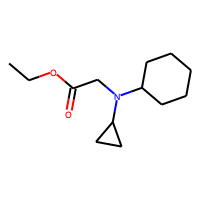

In [213]:
functional_group_df.iloc[0]

In [ ]:
source_10times[0]

In [ ]:
source_10times = []
source_all_10times = []
dicnum = 6
times = 10
for j in range(dicnum):
    for i in range(times):
        random_dic = createRandomDic()
        functional_group_df = random_dic[div_per_str_list[j]]
        source_10times.append(createSource(functional_group_df))
    source_all_10times.append(source_10times)
    source_10times_t = np.array(source_10times).T.tolist()
source_cv_list = []
source_all_cv_list = []

In [ ]:
len(source_10times_t)

In [ ]:
len(source_10times)

In [ ]:
for i in range(times):
        random_dic = createRandomDic()
        functional_group_df = random_dic[div_per_str_list[6]]
        source_10times.append(createSource(functional_group_df))

In [ ]:
len(source_10times)

In [ ]:
source_cv_list = []
source_all_cv_list = {}
for j in range(dicnum):
    for i in source_10times_t:
        tem = np.array(i)
        source_cv_list.append([int(tem.mean()),tem.std(),tem.std()/tem.mean()])
        source_cv_list_t = np.array(source_cv_list).T.tolist()
        tem_df = pd.DataFrame(source_cv_list_t,index = ["MN","SD","CV"])
        
    source_all_cv_list[div_per_str_list[j]] = tem_df
    

In [ ]:
source_all_cv_list[div_per_str_list[0]]

In [ ]:
for i in div_per_str_list:
    source_all_cv_list[i].to_csv("excel_py/" + str(i) + ".csv",header=True,index=False)

In [ ]:
for j in range(6):
    for i in source_10times_t:
        tem = np.array(i)
        source_cv_list.append(tem.std()/tem.mean())
    source_all_cv_list[] = source_cv_list)
    

In [ ]:
len(div_per_str_list)

In [ ]:
source_all_cv_list

In [ ]:
functional_group_df.iloc[1,5:]

In [ ]:
source_10times_t = np.array(source_10times).T.tolist()

In [ ]:
for i in range(len(random_dic)):
    title = div_per_str_list[i]
    functional_group_df = random_dic[div_per_str_list[i]]
    show_figure1(functional_group_df,title)

In [ ]:
len(random_dic)

In [ ]:
random_list

In [ ]:
list(result_df["CID"].iloc[random_list[0]])

In [ ]:
random_dic[div_per_str_list[0]]

In [ ]:
result_df.iloc[random_list[0]]

In [ ]:
result_df.iloc[createRandom(divideNumber(100000))[6]]